## Simple demo on DES cutout REST API

In [72]:
import requests
from IPython.display import Image, display

In [73]:
# Positions
ra=[26.2928,0.61667249,41.56288000,39.47087800]
dec=[-48.6917,0.13929069,-55.68925100,-41.54843300]
xsize=[1.0,2.0,4.]
ysize=[1.0,2.0]
password='xxxx'

In [74]:
# create get request
req='http://desdev2.cosmology.illinois.edu/api?username=demo_user&password=%s&ra=%s&dec=%s&xsize=%s&ysize=%s' % (password,ra,dec, xsize, ysize)
req

'http://desdev2.cosmology.illinois.edu/api?username=demo_user&password=07spihc&ra=[26.2928, 0.61667249, 41.56288, 39.470878]&dec=[-48.6917, 0.13929069, -55.689251, -41.548433]&xsize=[1.0, 2.0, 4.0]&ysize=[1.0, 2.0]'

In [75]:
req_token='http://desdev2.cosmology.illinois.edu/api/token/?username=demo_user&password=%s' % (password)

In [76]:
token=requests.get(req_token)

In [77]:
token.text

'{"status": "ok", "token": "a94278e6792bb443b0169391f5f6487bb3356de6", "message": "Token created, expiration is 24 hours"}'

In [78]:
tt=requests.get('http://desdev2.cosmology.illinois.edu/api/token/?token=%s' % token.json()['token'])
tt.text

'{"status": "ok", "message": "Token is valid for 118.0 seconds", "token": "a94278e6792bb443b0169391f5f6487bb3356de6"}'

### This request will submit a job given the positions

In [79]:
submit = requests.get(req)

In [80]:
print(submit.json()['status'])
print(submit.json()['message'])
jobid=submit.json()['job']

ok
Job 604481ec-4253-4c21-8f6b-c95445a5b186 submitted.


### The following query the job

In [87]:
req=r'http://desdev2.cosmology.illinois.edu/api/jobs?username=demo_user&password=%s&jobid=%s' % (password,jobid)

In [89]:
r = requests.get(req)

In [90]:
print(r.json()['status'])
print(r.json()['message'])

ok
Job completed.


### This will generate a list of all files, can be downloaded using wget

In [91]:
links=r.json()['links']
k=0
for l in links:
    # only use png
    if l.endswith('png'):
        print(l)
        r = requests.get(l, stream=True)
        if r.status_code == 200:
            # save png to file
            with open('image_%d.png' % k, 'wb') as f:
                for chunk in r:
                    f.write(chunk)
        k+=1

http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1.tif.png
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ000228.0+000821.4.tif.png
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ024615.1-554121.3.tif.png
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ023753.0-413254.4.tif.png


### Display png generated

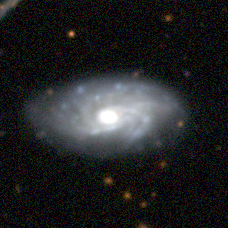

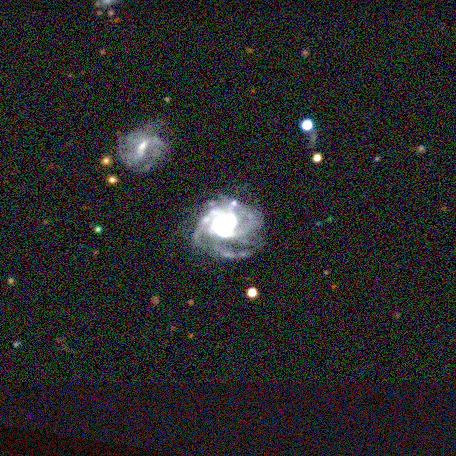

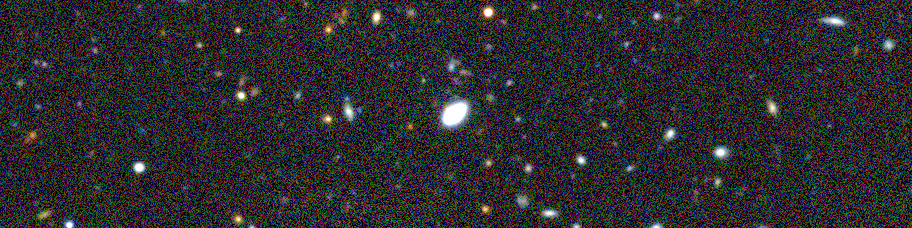

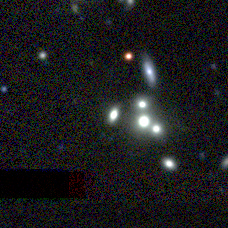

In [92]:
for j in range(k):
    x=Image(filename='image_%d.png' % j)
    display(x)

In [93]:
for l in links: print(l)

http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1_z.fits
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1_i.fits
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1_r.fits
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1_Y.fits
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1_g.fits
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1.stifflog
http://desdev2.cosmology.illinois.edu/static/uploads/demo_user/results/604481ec-4253-4c21-8f6b-c95445a5b186/DESJ014510.3-484130.1.tif
http://desdev2.cosmology.illinois.edu/stat

In [94]:
ra=[26.2928]
dec=[-48.6917]
xsize=[1.0,2.0,4.]
ysize=[1.0,2.0]

In [95]:
req='http://desdev3.cosmology.illinois.edu:8000/api?username=demo_user&password=%s&ra=%s&dec=%s&bands=i' % (password,ra,dec)


In [96]:
sub2=requests.get(req)

In [97]:
sub2.text

'{"message": "Job 24ab1849-6d73-41ee-9554-1f5d9a05596e for demo_user has been submitted", "job": "24ab1849-6d73-41ee-9554-1f5d9a05596e", "status": "ok"}'

In [98]:
jobid=sub2.json()['job']

In [101]:
jj=requests.get('http://desdev3.cosmology.illinois.edu:8000/api/jobs?username=demo_user&password=%s&jobid=%s'%(password,jobid))

In [102]:
print(jj.json()['status'])
links=jj.json()['links']

ok


In [103]:
links

['http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131010.fits',
 'http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131010.png',
 'http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131204.fits',
 'http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131204.png',
 'http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131223.fits',
 'http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9

In [104]:
links=jj.json()['links']
k=0
for l in links:
    # only use png
    if l.endswith('png'):
        print(l)
        r = requests.get(l, stream=True)
        if r.status_code == 200:
            # save png to file
            with open('se_%d.png' % k, 'wb') as f:
                for chunk in r:
                    f.write(chunk)
        k+=1

http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131010.png
http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131204.png
http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131223.png
http://desdev3.cosmology.illinois.edu/static/uploads/demo_user/results/24ab1849-6d73-41ee-9554-1f5d9a05596e/thumbs_DESJ_014510.3-484130.1/DESJ014510.3-484130.1_i_20131231.png


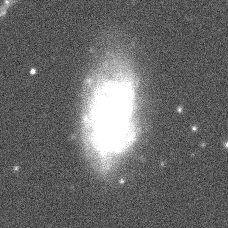

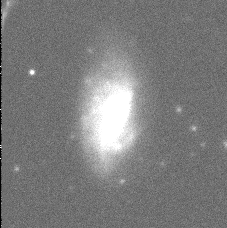

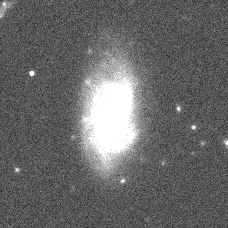

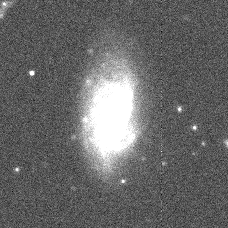

In [105]:
for j in range(k):
    x=Image(filename='se_%d.png' % j)
    display(x)